In [4]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from datetime import date
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pickle

In [5]:
df_submission = pd.read_csv('data/SubmissionFormat.csv')

df_test = pd.read_csv('data/test_set_values.csv')
df_training_labels = pd.read_csv('data/training_set_labels.csv')
df_training_values = pd.read_csv('data/training_set_values.csv')


In [6]:
df_train = pd.concat([df_training_values, df_training_labels], join='inner',axis=1)

In [7]:
df_train.shape

(59400, 42)

In [8]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'id', 'status_group'],
      dtype='object')

In [9]:
X_train = df_training_values.drop('id',axis=1)
y_train = df_training_labels.drop('id',axis=1)

In [10]:
X_test = df_test.drop('id',axis=1)

In [11]:
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'])
X_train['days_old'] = pd.to_datetime(date.today()) - X_train['date_recorded']
X_train = X_train.drop('date_recorded',axis=1)
X_train['days_old'].head()

0   3213 days
1   2490 days
2   2499 days
3   2527 days
4   3092 days
Name: days_old, dtype: timedelta64[ns]

In [12]:
X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'])
X_test['days_old'] = pd.to_datetime(date.today()) - X_test['date_recorded']
X_test = X_test.drop('date_recorded',axis=1)

In [13]:
def nan_func(column):
    X_train[column].fillna('others', inplace=True)
    X_test[column].fillna('others', inplace=True)

In [14]:
nan_func('funder')
nan_func('installer')
nan_func('subvillage')
nan_func('scheme_management')
nan_func('permit')

In [15]:
X_train['permit'] = X_train['permit'].replace({True: 'T', False: 'F'})
X_test['permit'] = X_test['permit'].replace({True: 'T', False: 'F'})
X_train['permit']

0        F
1        T
2        T
3        T
4        T
        ..
59395    T
59396    T
59397    F
59398    T
59399    T
Name: permit, Length: 59400, dtype: object

In [16]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.543080808080808

In [36]:
X_train['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [37]:
X_train['funder'].unique()


array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [38]:
X_train[ 'scheme_name'].value_counts()

K                                   682
None                                644
Borehole                            546
Chalinze wate                       405
M                                   400
                                   ... 
Zahanati                              1
mwamagembe windmill piped scheme      1
Mongwe r                              1
Libango water use group science       1
Mradi wa maji Vijijini                1
Name: scheme_name, Length: 2696, dtype: int64

In [39]:
X_train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [40]:
X_train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [41]:
X_train['scheme_name'].value_counts()

K                                   682
None                                644
Borehole                            546
Chalinze wate                       405
M                                   400
                                   ... 
Zahanati                              1
mwamagembe windmill piped scheme      1
Mongwe r                              1
Libango water use group science       1
Mradi wa maji Vijijini                1
Name: scheme_name, Length: 2696, dtype: int64

In [42]:
X_train.shape

(59400, 39)

In [21]:
(X_train['subvillage']=='other').sum()

0

In [22]:
X_train['permit'].isna().sum()

0

In [20]:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'days_old'],
      dtype='object')

In [17]:
# 'funder'
X_train_min = X_train[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','basin','population','recorded_by','scheme_management',
                        'permit', 'construction_year','extraction_type','management_group','payment','quality_group','source_class','waterpoint_type_group','days_old']]
X_train_max = X_train[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','subvillage','population','recorded_by','scheme_management',
                       'permit', 'construction_year','extraction_type_class','management','payment','quantity','source', 'waterpoint_type','days_old']]

In [18]:
X_test_min = X_test[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','basin','population','recorded_by','scheme_management',
                        'permit', 'construction_year','extraction_type','management_group','payment','quality_group','source_class','waterpoint_type_group','days_old']]
X_test_max = X_test[['amount_tsh','gps_height', 'installer','wpt_name', 'num_private','subvillage','population','recorded_by','scheme_management',
                       'permit', 'construction_year','extraction_type_class','management','payment','quantity','source', 'waterpoint_type','days_old']]

In [19]:
X_train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [20]:
#parses df for cateborical variables
# def ohe_func(input_df: pd.DataFrame, cat_var: List[str]) -> pd.DataFrame:
def ohe_func(input_df,X_test, items):
    """One Hot Encodes categorical variables"""
    object_list = []
    other_list = []
    for var in items:
        if (input_df[var].dtype) == object:
            object_list.append(var)
        else:
            other_list.append(var)
#             print(var)
#         # Load necessary data
    cat_df = input_df[object_list]
    cat_df_test = X_test[object_list]
#         # Create OHE object
    ohe = OneHotEncoder(categories = 'auto', handle_unknown='ignore').fit(cat_df)
#         # Create OHE DataFrame
    ohe_df = pd.DataFrame(ohe.transform(cat_df).toarray(), 
                    columns=ohe.get_feature_names(object_list))
    ohe_df_test = pd.DataFrame(ohe.transform(cat_df_test).toarray(), 
                    columns=ohe.get_feature_names(object_list))
    return pd.concat([ohe_df,input_df[other_list]], axis=1), pd.concat([ohe_df_test,X_test[other_list]], axis=1)
    


In [21]:
X_train_min.columns

Index(['amount_tsh', 'gps_height', 'installer', 'wpt_name', 'num_private',
       'basin', 'population', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management_group', 'payment',
       'quality_group', 'source_class', 'waterpoint_type_group', 'days_old'],
      dtype='object')

In [ ]:
X_train_min_ohe, X_test_min_ohe = ohe_func(X_train_min,X_test_min, ['amount_tsh', 'gps_height', 'installer',
                                         'wpt_name', 'num_private',
       'basin', 'population', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management_group', 'payment',
       'quality_group', 'source_class', 'waterpoint_type_group'])

In [ ]:
with open('data\X_train_min_ohe.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(X_train_min_ohe, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('data\X_test_min_ohe.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(X_test_min_ohe, f, pickle.HIGHEST_PROTOCOL)

In [41]:
X_train_min_ohe.head(5)

,installer_-,installer_0,installer_A.D.B,installer_AAR,installer_ABASIA,installer_ABD,installer_ABDALA,installer_ABDUL,installer_AC,installer_ACORD,...,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,amount_tsh,gps_height,num_private,population,construction_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6000.0,1390,0,109,1999
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1399,0,280,2010
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,25.0,686,0,250,2009
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,263,0,58,1986
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
X_train_min.head()

In [42]:
from sklearn.tree import DecisionTreeClassifier 

In [1]:
dtc = DecisionTreeClassifier()

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
dtc.fit(X_train_min_ohe, y_train)

In [ ]:

dtc.score(X_train, y_train)

In [68]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [71]:
import seaborn as sns

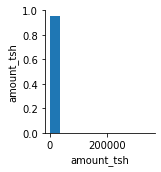

In [76]:
sns.pairplot(df_train[columns_to_use])

In [46]:
df_training_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [33]:
df_water.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [34]:
df_water.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [36]:
df_water.shape

(14850, 40)

In [21]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20,39,40,41,43,47,48,49,54,57,58,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df_people = pd.read_csv('Traffic_Crashes_-_People.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,19,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df[df['RD_NO']== 'HY368708']

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
49004,HY368708,NaN,08/04/2015 12:40:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)


In [27]:
df_people.head()

,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O10,DRIVER,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O100,DRIVER,HY374018,96.0,07/31/2015 05:50:00 PM,NaN,ELK GROVE,IL,60007,M,...,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1000,DRIVER,HY407431,954.0,09/02/2015 11:45:00 AM,NaN,CHICAGO,IL,NaN,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10000,DRIVER,HY484148,9561.0,10/31/2015 09:30:00 PM,NaN,SKOKIE,IL,60076,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O100001,DRIVER,HZ525619,96762.0,11/15/2016 05:45:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [25]:
df_vehicles.head()

,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,10,HY368708,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,Focus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,HY374018,07/31/2015 05:50:00 PM,1,DRIVER,NaN,96.0,NaN,NISSAN,Pathfinder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,HY407431,09/02/2015 11:45:00 AM,1,DRIVER,NaN,954.0,NaN,FORD,F150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,HY484148,10/31/2015 09:30:00 PM,2,DRIVER,NaN,9561.0,NaN,HYUNDAI,SONATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,HZ518934,11/16/2016 01:00:00 PM,2,PARKED,NaN,96745.0,NaN,"TOYOTA MOTOR COMPANY, LTD.",RAV4 (sport utility),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['INJURIES_FATAL'].value_counts()


0.0    369859
1.0       285
2.0        15
3.0         4
Name: INJURIES_FATAL, dtype: int64